### Visualizations of the learned models

In this notebook, one can load two pre-trained models to see how the network is behaving. The following visualizations are the simplified and cleaned up versions of our submitted paper at https://arxiv.org/abs/1606.06724. 

In [ ]:
# Let's first Define some path to the pre-learned models.
MNIST_RUN = './pretrained_models/mnist-results'
SHAPES_RUN = './pretrained_models/shapes-results'

# Let's enable auto-reload for clarity.
%matplotlib inline
%load_ext autoreload
%autoreload 2
%pwd

In [ ]:
# prepare the import.
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from utils import AttributeDict
import tagger_exp

from analyze import analyze_plot_publication

#### Visualization of Network behavior on Shapes50k20x20

In [ ]:
# here we have five models to calculate the final AMI score
# default override
override = AttributeDict(
        n_iterations=5,
        n_groups=4,
        valid_batch_size=1000,
        batch_size=1000,
    )

shapes_exp = tagger_exp.TaggerExperiment.load(SHAPES_RUN, p_override=override)

In [ ]:
it = shapes_exp.streams['valid'].get_epoch_iterator(as_dict=True)
mb = next(it)
acts = shapes_exp.tagger.eval_acts(mb)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(9, 6)
(6, 2)
(3, 2)


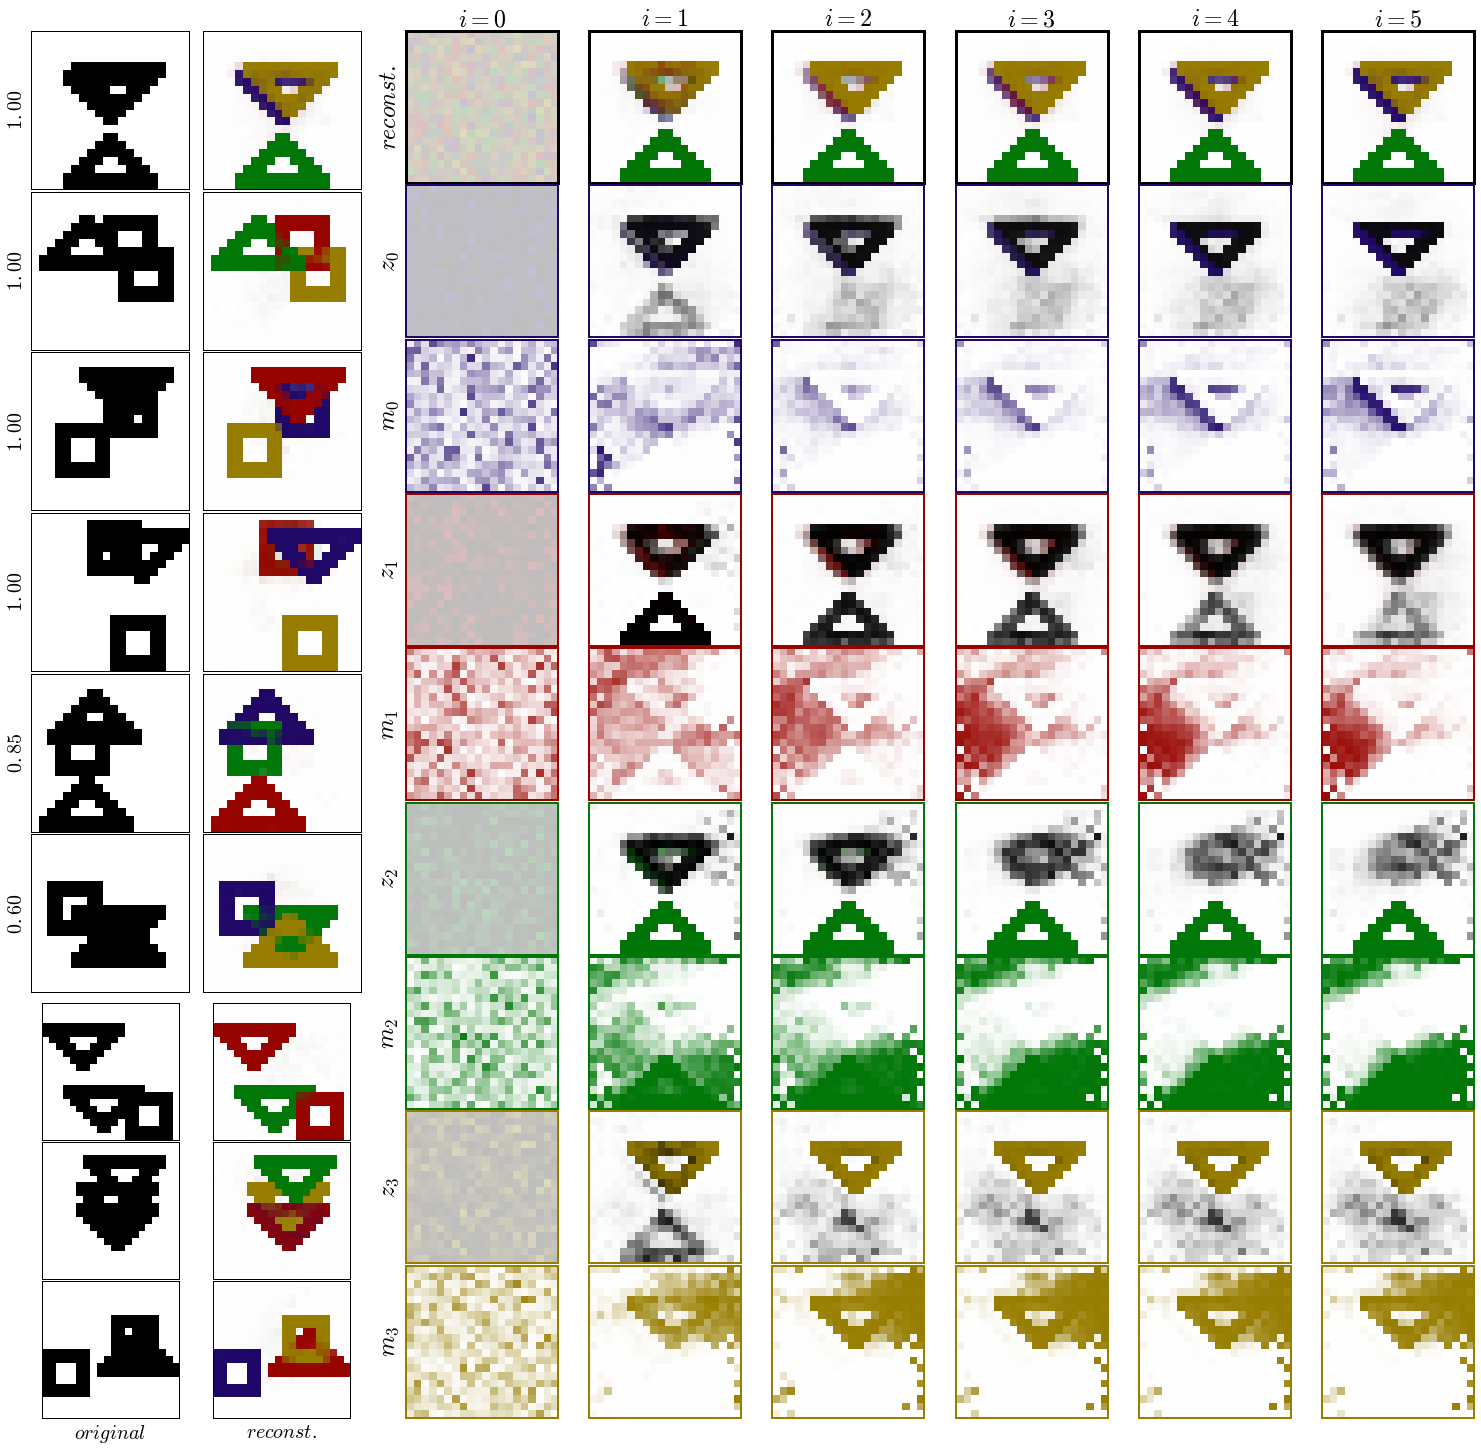

In [5]:
%load_ext autoreload
%autoreload 2
from analyze import analyze_plot_publication

index_to_plot = acts.clean.ami_score_per_sample[-1].argsort()[100:1000:80][:6][::-1]
index_to_zoom = index_to_plot[0]

special_pairs = [
    {
        'acts': acts,
        'mb': mb,
        'index': 25,
    },
    {
        'acts': acts,
        'mb': mb,
        'index': 19
    },
    {
        'acts': acts,
        'mb': mb,
        'index': 50,
    }
]

f = analyze_plot_publication(index_to_zoom, index_to_plot[:6], acts, mb, 
                             S=(20, 20), specials=special_pairs, saturations_in_z=True)

# MNIST

In [ ]:
mnist_override = AttributeDict(
    n_iterations=5,
    load_from=None,
    n_groups=4,
    valid_batch_size=1000,
    batch_size=1000,
    )
mnist_override2 = AttributeDict(
    dataset='freq20-1mnist',
    load_from=None,
    objects_per_sample=1,
    n_iterations=5,
    n_groups=4,
    valid_batch_size=1000,
    batch_size=1000,
    )

mnist_exp = tagger_exp.TaggerExperiment.load(MNIST_RUN, p_override=mnist_override)
mnist_exp1 = tagger_exp.TaggerExperiment.load(MNIST_RUN, p_override=mnist_override2)

In [ ]:
mnist_it = mnist_exp.streams['test'].get_epoch_iterator(as_dict=True)
mnist_it2 = mnist_exp1.streams['test'].get_epoch_iterator(as_dict=True)
mnist_mb = next(mnist_it)
mnist_mb2 = next(mnist_it2)

mnist_acts = mnist_exp.tagger.eval_acts(mnist_mb)
mnist_acts2 = mnist_exp1.tagger.eval_acts(mnist_mb2)

(9, 7)
(7, 2)
(3, 2)


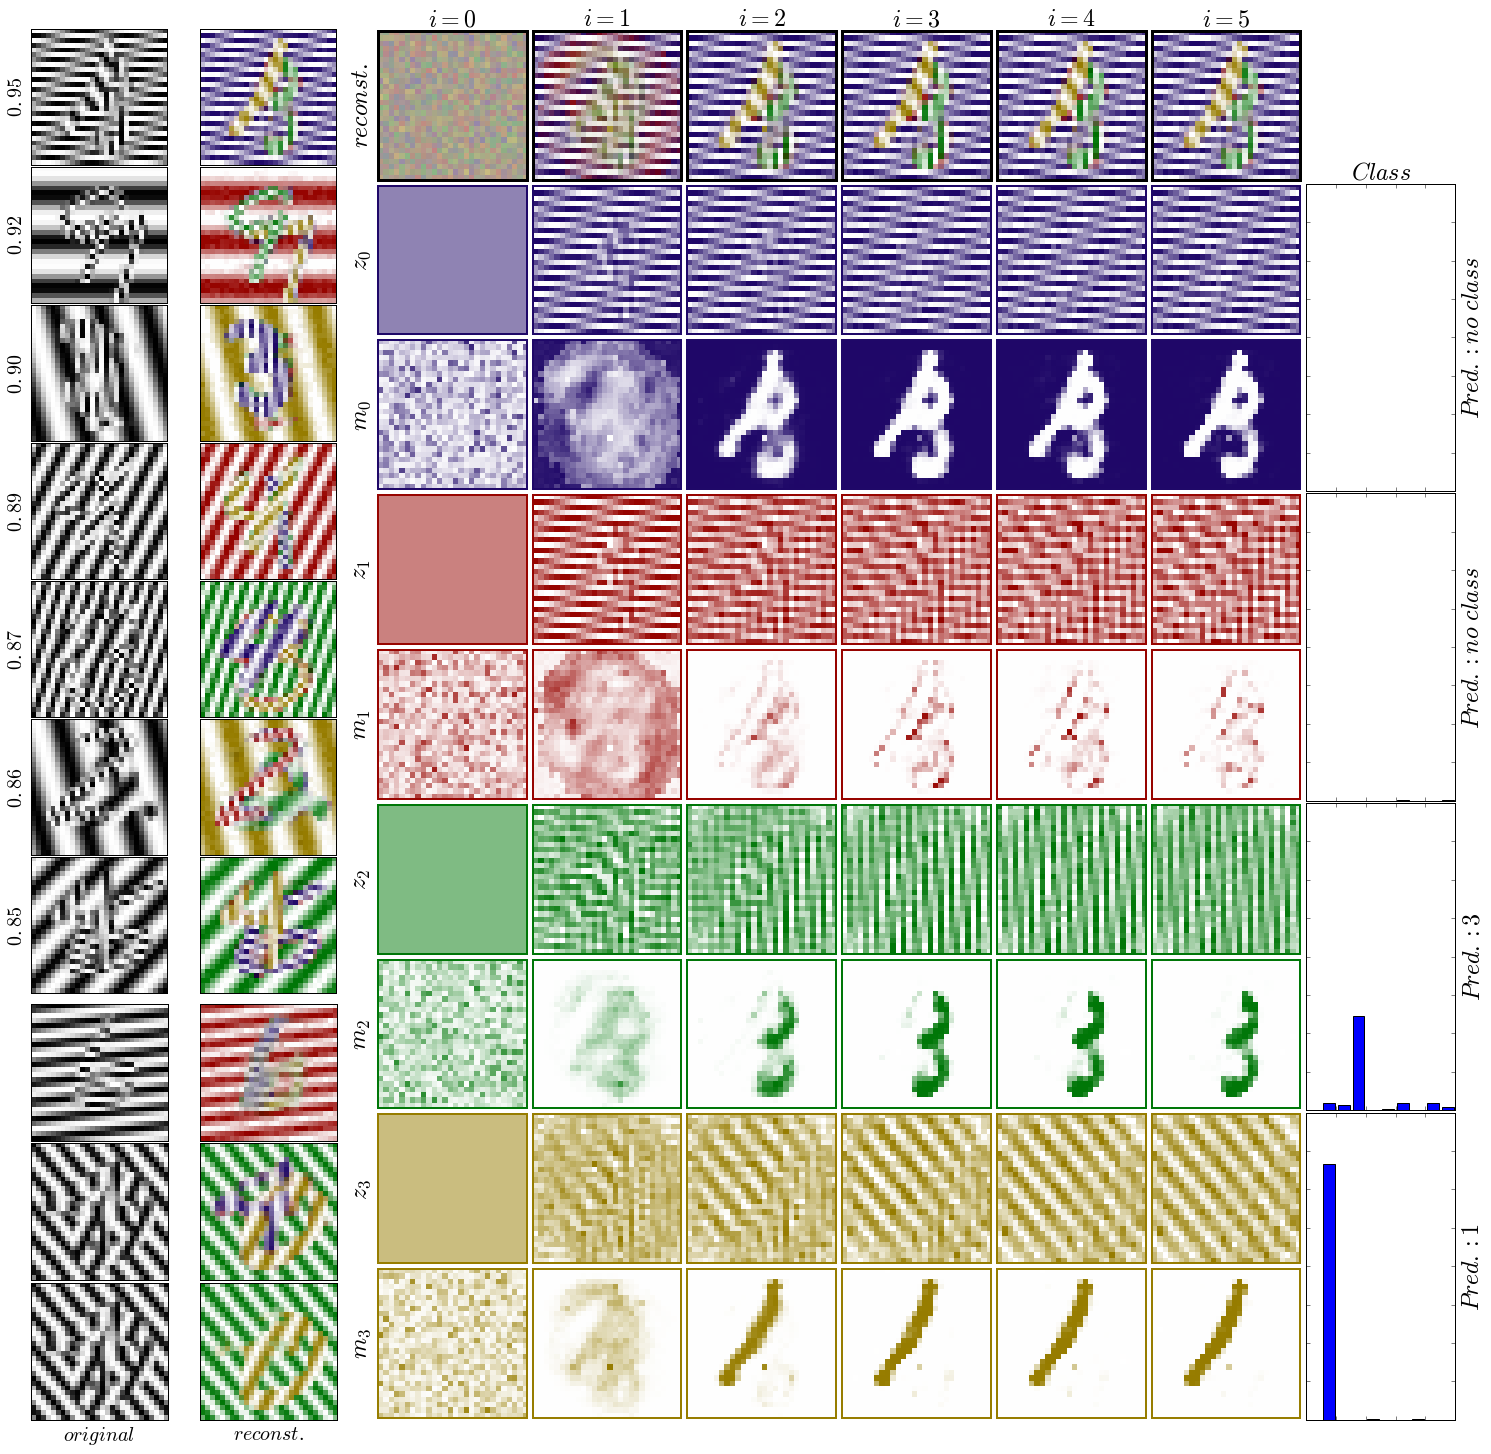

In [8]:
index_to_plot = mnist_acts.clean.ami_score_per_sample[-1].argsort()[154:1000:90][3:]

index_to_zoom = index_to_plot[-1]

special_pairs = [
    {
        'acts': mnist_acts2,
        'mb': mnist_mb2,
        'index': 19
    },
    {
        'path_x': './pretrained_models/mnist-results/mnist_removal_example_v3.npz',
        'type': 'm'
    },
    {
        'path_x': './pretrained_models/mnist-results/mnist_removal_example_v3.npz',
        'type': 'm_removed'
    }
]

f = analyze_plot_publication(index_to_zoom, index_to_plot[::-1], mnist_acts, mnist_mb, 
                             S=(28, 28), specials=special_pairs, plot_classification=True)